<a href="https://colab.research.google.com/github/HazSyl1/Perceptron/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Diabetes - Diabetes.csv')

In [3]:
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: xlabel='Glucose', ylabel='BMI'>

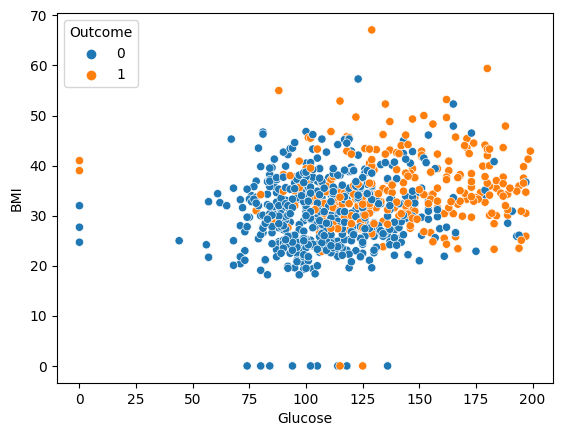

In [11]:
sns.scatterplot(x=df['Glucose'],y=df['BMI'],hue=df['Outcome'])

In [93]:
X = df[['BMI','Age','Glucose']]
y0 = df.iloc[:,-1]

In [94]:
print(type(y))

<class 'pandas.core.series.Series'>


In [95]:
print(X)

      BMI  Age  Glucose
0    33.6   50      148
1    26.6   31       85
2    23.3   32      183
3    28.1   21       89
4    43.1   33      137
..    ...  ...      ...
763  32.9   63      101
764  36.8   27      122
765  26.2   30      121
766  30.1   47      126
767  30.4   23       93

[768 rows x 3 columns]


In [96]:
print(y)

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64


In [97]:
X['Glucose'].replace(0,X['Glucose'].mean(),inplace=True)
X['Age'].replace(0,X['Age'].mean(),inplace=True)
X['BMI'].replace(0,X['BMI'].mean(),inplace=True)

<ipython-input-97-48628e5464c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Glucose'].replace(0,X['Glucose'].mean(),inplace=True)
<ipython-input-97-48628e5464c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].replace(0,X['Age'].mean(),inplace=True)
<ipython-input-97-48628e5464c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BMI'].replace(0,X['BMI'].mean(),inplace=True)


In [98]:
print(X)

      BMI  Age  Glucose
0    33.6   50    148.0
1    26.6   31     85.0
2    23.3   32    183.0
3    28.1   21     89.0
4    43.1   33    137.0
..    ...  ...      ...
763  32.9   63    101.0
764  36.8   27    122.0
765  26.2   30    121.0
766  30.1   47    126.0
767  30.4   23     93.0

[768 rows x 3 columns]


In [104]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [105]:
X=X.iloc[:,:2]

Coef:[[ 1.96328125 20.        ]]
Intercept:[-257.]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

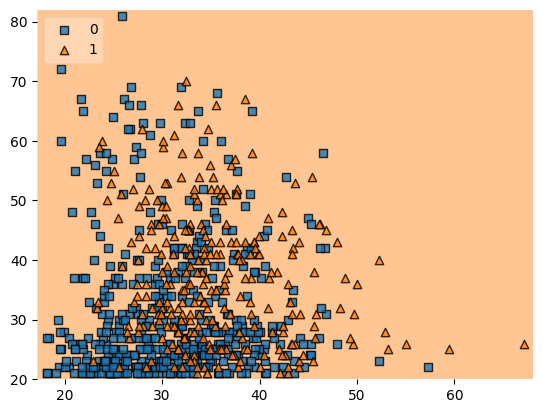

In [106]:
from mlxtend.plotting import plot_decision_regions
value=3
width=5
p.fit(X,y0)
print(f"Coef:{p.coef_}")
print(f"Intercept:{p.intercept_}\n")
plot_decision_regions(X.values, y0.values,
                      #feature_index=[0,2],
                      #filler_feature_values={ 2:value},
                      #filler_feature_ranges={ 2: width},
                      clf=p, legend=2)



# Tennis


In [81]:
dd=pd.read_csv('/content/tennis - tennis.csv')

In [83]:
dd.head(5)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dd.iloc[:,0] = le.fit_transform(dd.iloc[:,0]) # outlook column - index no. 0- will encode outlook column
dd.iloc[:,1] = le.fit_transform(dd.iloc[:,1]) # temp
dd.iloc[:,2] = le.fit_transform(dd.iloc[:,2]) # humidity
dd.iloc[:,3] = le.fit_transform(dd.iloc[:,3]) # windy
dd.iloc[:,4] = le.fit_transform(dd.iloc[:,4]) # play
print(dd)
dd.info()

    outlook  temp  humidity  windy  play
0         2     1         0      0     0
1         2     1         0      1     0
2         0     1         0      0     1
3         1     2         0      0     1
4         1     0         1      0     1
5         1     0         1      1     0
6         0     0         1      1     1
7         2     2         0      0     0
8         2     0         1      0     1
9         1     2         1      0     1
10        2     2         1      1     1
11        0     2         0      1     1
12        0     1         1      0     1
13        1     2         0      1     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   outlook   14 non-null     int64
 1   temp      14 non-null     int64
 2   humidity  14 non-null     int64
 3   windy     14 non-null     int64
 4   play      14 non-null     int64
dtypes: int64(5)
memory 

<ipython-input-85-be63428fe3d1>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dd.iloc[:,0] = le.fit_transform(dd.iloc[:,0]) # outlook column - index no. 0- will encode outlook column
<ipython-input-85-be63428fe3d1>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dd.iloc[:,1] = le.fit_transform(dd.iloc[:,1]) # temp
<ipython-input-85-be63428fe3d1>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.

In [87]:
x=dd.iloc[:,0:4]
y=dd.iloc[:,4]
print(x.shape)
print(y.shape)

(14, 4)
(14,)


Coef:[[-3.  4.  9. -5.]]
Intercept:[2.]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

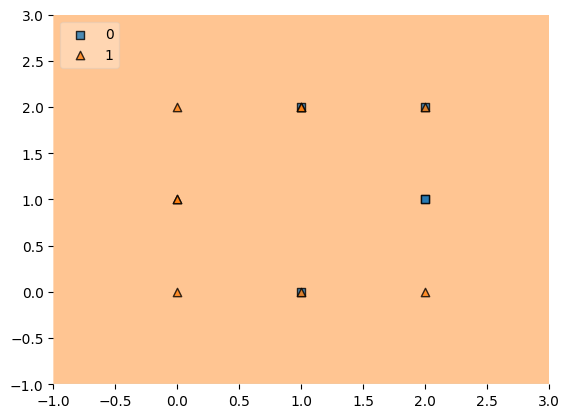

In [107]:
value=2
width=3
p.fit(x,y)
print(f"Coef:{p.coef_}")
print(f"Intercept:{p.intercept_}\n")
plot_decision_regions(x.values, y.values,
                      #feature_index=[0,2],
                      filler_feature_values={0: value, 2:value , 3:value},
                      filler_feature_ranges={0: width, 2: width , 3:width},
                      clf=p, legend=2)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

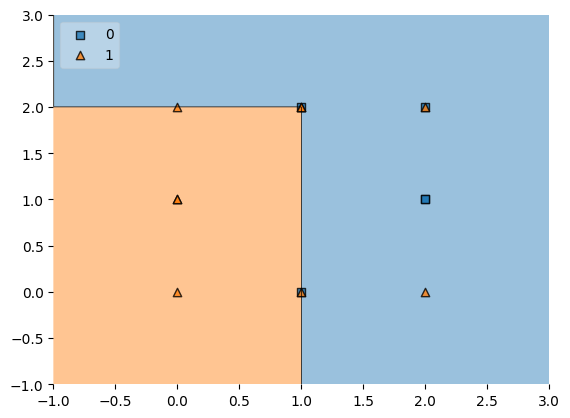

In [112]:
x=x.iloc[:,:2]
p.fit(x,y)
plot_decision_regions(x.values, y.values,
                      #feature_index=[0,2],
                      #filler_feature_values={0: value, 2:value , 3:value},
                      #filler_feature_ranges={0: width, 2: width , 3:width},
                      clf=p, legend=2)
